<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/DR-mostafa/blob/main/traditional%20autoencoder/traditional_ae_colab_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# related to kaggle 

In [ ]:
!conda install -y gdown

In [ ]:
#downloading first part of ECG
!gdown https://drive.google.com/uc?id=1jt__DwKtdHOQypNVBjnp9SeaqGwoRazG

In [ ]:
#downloading first part of PPG  beats data
!gdown https://drive.google.com/uc?id=1u-QWYMJ3h7bd2fWy5UmUgQtCtvmWge-K

In [ ]:
#downloading second part of ecg  beats data
!gdown https://drive.google.com/uc?id=1K1-xeL4RKmURSsppi0X7s7U4TQVOy7eF   

In [ ]:
#downloading third part of ecg  beats data
!gdown https://drive.google.com/uc?id=1w-2QFZ5CnchAm0JkwfQ-lLBTwLYO4Hc0   

In [ ]:
#downloading fourth part of ecg  beats data
!gdown https://drive.google.com/uc?id=13Y7gLQb3FNWsRlQ8DUp5JP9UUttjytQm

In [ ]:
#downloading second part of PPG peak to peak beats data
!gdown https://drive.google.com/uc?id=1F086tcERdEOcsbvqRmhN6PGX6NVZqX3P

In [ ]:
#downloading third part of PPG peak to peak beats data
!gdown https://drive.google.com/uc?id=1LWxX-F5z177l6OEUS4V7nJxbJnpK4A5G

In [ ]:
#downloading fourth part of PPG peak to peak beats data
!gdown https://drive.google.com/uc?id=1faRVH5KPR-q4gxhS86DFfkStCxYo5tHd

# Downloading model from gdrive

In [ ]:
!gdown https://drive.google.com/uc?id=1MFNll8OlSnXVVoJsiACEgsTjvdaRBRPU


In [ ]:
import os

# folder path
dir_path = r'./'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

In [ ]:
"PPG" in 'Part_4_PPG_beats_P2P_Aug_2022.csv'

In [ ]:
res_ecg = []
res_ppg = []
for i in res:
    if ("PPG".lower() in i.lower()):
        res_ppg.append("./"+i)
    elif ("ECG".lower() in i.lower()):
        res_ecg.append("./"+i)
print("ECGs are ",res_ecg)
print("*=+"*30)
print("PPGs are ",res_ppg)

In [ ]:
ECG1 = pd.read_csv(res_ecg[0],names = np.arange(120))
ECG2 = pd.read_csv(res_ecg[1],names = np.arange(120))
ECG3 = pd.read_csv(res_ecg[2],names = np.arange(120))
ECG4 = pd.read_csv(res_ecg[3],names = np.arange(120))

PPG1 = pd.read_csv(res_ppg[0],names = np.arange(120))
PPG2 = pd.read_csv(res_ppg[1],names = np.arange(120))
PPG3 = pd.read_csv(res_ppg[2],names = np.arange(120))
PPG4 = pd.read_csv(res_ppg[3],names = np.arange(120))

#Colab part

# Sequence of notebooke:


1.   read data from google drive
2.   splite data to test and train 
3.   clean data from outliers
4.   build model and train it






# import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from keras.layers import *
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.models import Model
from  IPython.display import clear_output
import seaborn as sns
#for Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

#Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Master/')

In [ ]:
import Functions_Classes as F

# Read Datasets

In [ ]:
ECG1 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_1/p2p_beats/part_1_ECG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))
PPG1 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_1/p2p_beats/part_1_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))


PPG2 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_2/p2p_beats/Part_2_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))

ECG2= pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_2/p2p_beats/Part_2_ECG_beats_P2P_Aug_2022.csv",
                  names = np.arange(120))


PPG3 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_3/p2p_beats/Part_3_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))
ECG3= pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_3/p2p_beats/Part_3_ECG_beats_P2P_Aug_2022.csv",
                  names = np.arange(120))


PPG4 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_4/p2p_beats/Part_4_PPG_beats_P2P_Aug_2022.csv",
                   names = np.arange(120))
ECG4= pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_4/p2p_beats/Part_4_ECG_beats_P2P_Aug_2022.csv",
                  names = np.arange(120))


In [ ]:
ID1 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_1/p2p_beats/part_1_Subj_ID_beats_P2P_Aug_2022.csv"
                    ,names = ['id'])
ID2 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_2/p2p_beats/Part_2_Subj_ID_beats_P2P_Aug_2022.csv",
                  names = ['id'])
ID3 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_3/p2p_beats/Part_3_Subj_ID_beats_P2P_Aug_2022.csv",
                  names = ['id'])
ID4 = pd.read_csv("/content/gdrive/MyDrive/most cleaned version beats/Peak2peak_signals&beats_Aug_2022/Part_4/p2p_beats/Part_4_Subj_ID_beats_P2P_Aug_2022.csv",
                  names = ['id'])


# Check Shapes

In [ ]:
print("Shape of PPG 1 = ",PPG1.shape)
print("Shape of ECG 1 = ",ECG1.shape)
print("Shape of ID 1 = ",ID1.shape)
print("**"*20)

print("Shape of PPG 2 = ",PPG2.shape)
print("Shape of ECG 2 = ",ECG2.shape)
print("Shape of ID 2 = ",ID2.shape)
print("**"*20)

print("Shape of PPG 3 = ",PPG3.shape)
print("Shape of ECG 3 = ",ECG3.shape)
print("Shape of ID 3 = ",ID3.shape)
print("**"*20)


print("Shape of PPG 4 = ",PPG4.shape)
print("Shape of ECG 4 = ",ECG4.shape)
print("Shape of ID 4 = ",ID4.shape)

Shape of PPG 1 =  (154540, 120)
Shape of ECG 1 =  (154540, 120)
Shape of ID 1 =  (154540, 1)
****************************************
Shape of PPG 2 =  (205320, 120)
Shape of ECG 2 =  (205320, 120)
Shape of ID 2 =  (205320, 1)
****************************************
Shape of PPG 3 =  (152650, 120)
Shape of ECG 3 =  (152650, 120)
Shape of ID 3 =  (152650, 1)
****************************************
Shape of PPG 4 =  (179060, 120)
Shape of ECG 4 =  (179060, 120)
Shape of ID 4 =  (179060, 1)


In [ ]:
PPG2.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.0000,0.99936,0.99342,0.98038,0.96353,0.94247,0.91710,0.88756,0.85714,0.82409,...,0.52681,0.60618,0.67979,0.74262,0.79751,0.84176,0.87296,0.89271,0.90317,0.90681
1,1.0000,0.99379,0.98255,0.96696,0.94685,0.92224,0.89306,0.85940,0.82271,0.78420,...,0.52567,0.60321,0.67661,0.74411,0.80116,0.84753,0.88339,0.90873,0.92312,0.92853
2,0.6994,0.69738,0.69147,0.68079,0.66662,0.65012,0.63086,0.60789,0.58268,0.55507,...,0.59157,0.66460,0.73871,0.80598,0.86372,0.91217,0.95106,0.97777,0.99347,1.00000
3,0.9778,0.97774,0.97085,0.95468,0.93467,0.90811,0.87914,0.85212,0.82253,0.78959,...,0.67356,0.74047,0.79952,0.85645,0.90575,0.94486,0.97208,0.99032,0.99862,1.00000
4,0.9368,0.93153,0.92007,0.90214,0.87864,0.85156,0.82178,0.79004,0.75420,0.71873,...,0.65946,0.73651,0.80629,0.86763,0.91272,0.94569,0.96969,0.98626,0.99596,1.00000


In [ ]:
ID1

,id
0,1
1,1
2,1
3,1
4,1
...,...
154535,3000
154536,3000
154537,3000
154538,3000


# seperate train, test, and validation datasets

In [ ]:
def train_test_seperator(ppg_ecg_df,id_df,start_id=1 , stop_id = 301):
  ids = np.arange(start_id,stop_id)
  ids = np.where(id_df.values == ids)[0]
  test_df = ppg_ecg_df.iloc[ids,:]
  train_df = ppg_ecg_df.drop(ids,axis = 0)
  return train_df.reset_index(drop=True) , test_df.reset_index(drop=True)


In [ ]:
def train_test_seperator_all(ppg_ecg_df_lst , id_df_lst , start_id=1 , stop_id=301 ):
  train_df_all = pd.DataFrame()
  test_df_all = pd.DataFrame()
  for i in range(len(id_df_lst)):
    train_df , test_df = train_test_seperator(ppg_ecg_df_lst[i],id_df_lst[i],start_id , stop_id)
    train_df_all = pd.concat([train_df_all,train_df], keys =list(map(str,list(range(0,120)))),ignore_index = True  )
    test_df_all = pd.concat([test_df_all,test_df], keys =list(map(str,list(range(0,120)))),ignore_index = True  )
  return train_df_all , test_df_all


In [ ]:
PPG_train ,PPG_test = train_test_seperator_all([PPG1 , PPG2,PPG3,PPG4],[ID1,ID2,ID3,ID4],1,301)

In [ ]:
ECG_train ,ECG_test = train_test_seperator_all([ECG1 , ECG2,ECG3,ECG4],[ID1,ID2,ID3,ID4],1,301)

In [ ]:
PPG_train.shape , PPG_test.shape , ECG_train.shape , ECG_test.shape

((632240, 120), (59330, 120), (632240, 120), (59330, 120))

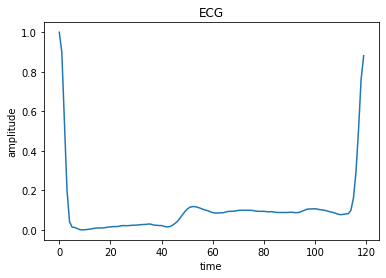

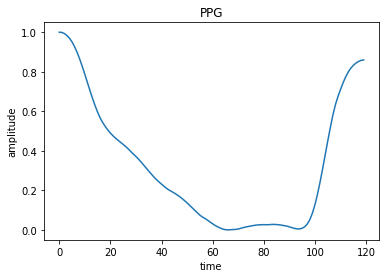

In [ ]:
plt.plot(ECG_train.iloc[0,:].values);
plt.xlabel('time');
plt.ylabel('amplitude');
plt.title("ECG");

plt.figure();
plt.plot(PPG_train.iloc[0,:].values);
plt.xlabel('time');
plt.ylabel('amplitude');
plt.title("PPG");

# Some Data Visualization

variance ratio is  [0.40243247 0.28516978 0.11556709]
outliers from  pca1  column is  (3571,)
outliers from  pca2  column is  (10959,)
outliers from  pca3  column is  (17591,)
histogram of pca with and without outliers
shape with outliers is  (632240, 120)
shape without outliers is (600119, 120)


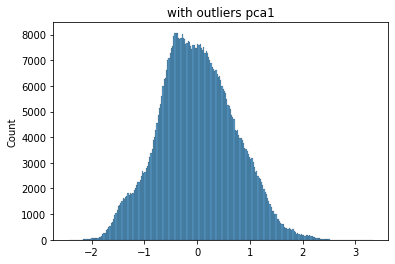

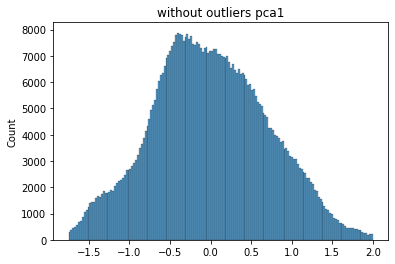

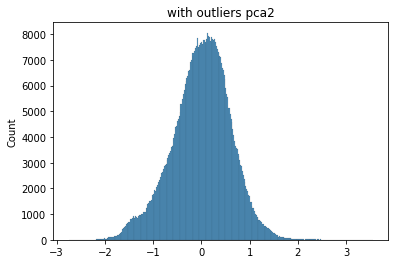

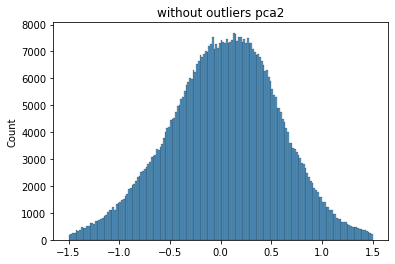

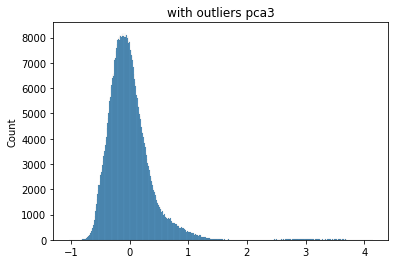

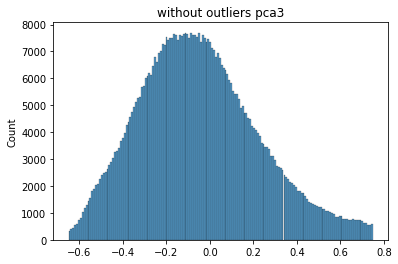

In [ ]:
PPG_train , ECG_train= F.all_together(PPG_train,ECG_train, 1,[(2,-1.75),(1.5,-1.5),(0.75,-0.65)])[2:]

variance ratio is  [0.37639139 0.25840037 0.12860031]
outliers from  pca1  column is  (20,)
outliers from  pca2  column is  (478,)
outliers from  pca3  column is  (1435,)
histogram of pca with and without outliers
shape with outliers is  (59330, 120)
shape without outliers is (57397, 120)


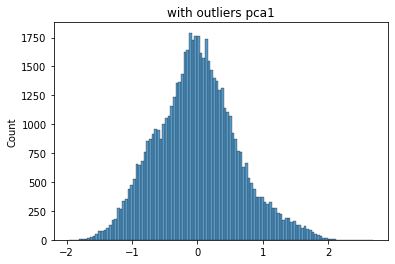

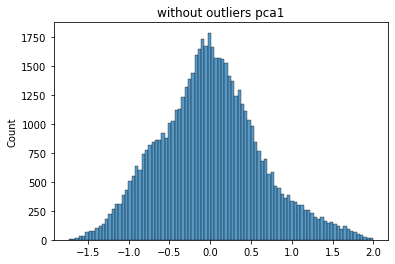

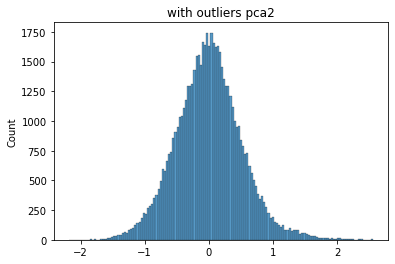

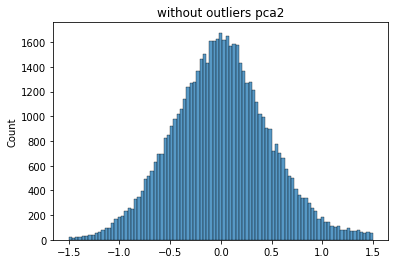

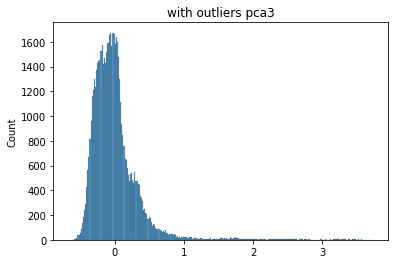

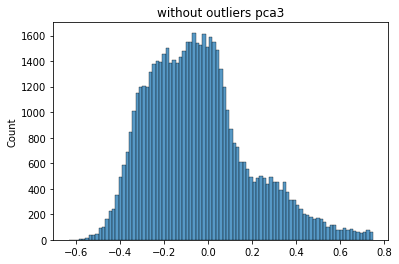

In [ ]:
PPG_test  , ECG_test  = F.all_together(PPG_test,ECG_test, 1,[(2,-1.75),(1.5,-1.5),(0.75,-0.65)])[2:]                                                                                        

In [ ]:
X = PPG_train.values
input_shape = (X.shape[0],120,1)
X = np.reshape(X,input_shape)
print("input shape is ",X.shape)
y= ECG_train.values
input_shape = (y.shape[0],120,1)
y = np.reshape(y,input_shape)
print("output shape is ",y.shape)

input shape is  (600119, 120, 1)
output shape is  (600119, 120, 1)


In [ ]:
X_train,X_val , y_train  , y_val = train_test_split(X , y , test_size = 0.08)
print("train shape is ",X_train.shape)
print("validation shape is ",X_val.shape)

train shape is  (552109, 120, 1)
validation shape is  (48010, 120, 1)


In [ ]:
#for shuffling
indexes_train = np.random.randint(0,X_train.shape[0],X_train.shape[0])
X_train = X_train[indexes_train,:,0]
y_train = y_train[indexes_train,:,0]

indexes_val = np.random.randint(0,X_val.shape[0],X_val.shape[0])
X_val = X_val[indexes_val,:,0]
y_val = y_val[indexes_val,:,0]

In [ ]:
X_train,X_val , y_train  , y_val = train_test_split(X , y , test_size = 0.08)
print("train shape is ",X_train.shape)
print("test shape is ",X_val.shape)

train shape is  (552109, 120, 1)
test shape is  (48010, 120, 1)


In [ ]:
def autoencoder_builder():
  model = Sequential()

  model.add(Conv1D(256, 11, padding='same', input_shape=input_shape[1:]))
  model.add(MaxPooling1D(2, padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  """    model.add(Conv1D(256, 5, padding='same'))
      model.add(MaxPooling1D(2, padding='same'))
      model.add(BatchNormalization())
      model.add(LeakyReLU())"""

  model.add(Conv1D(128, 7, padding='same'))
  model.add(MaxPooling1D(2, padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv1D(64, 5, padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(MaxPooling1D(2, padding='same'))
  #model.add(BatchNormalization())

  model.add(Conv1D(64,3, padding='same')) 
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  #model.add(MaxPooling1D(2, padding='same'))

  model.add(Conv1DTranspose(64, 3, padding='same',strides = 2))
  #model.add(UpSampling1D(2)) 
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv1DTranspose(64, 5, padding='same',strides = 2))
  #model.add(UpSampling1D(2))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv1DTranspose(128, 7, padding='same',strides = 2))
  #model.add(UpSampling1D(2))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv1DTranspose(256, 11, padding='same'))
  #model.add(UpSampling1D(2))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  """  model.add(Conv1D(512, 5, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU())"""

  #model.add(UpSampling1D( 2))
  model.add(Conv1DTranspose(1, 5, padding='same'))
  model.add(LeakyReLU())
  model.summary()
  return model



In [ ]:
model_base = autoencoder_builder()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 120, 256)          3072      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 60, 256)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 60, 256)          1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 60, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 128)           229504    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 30, 128)          0

In [ ]:
callbacks = [
            keras.callbacks.TensorBoard(
            log_dir='my_log_dir',
            histogram_freq=1,
            embeddings_freq=1,
            ),
             ModelCheckpoint('/content/gdrive/MyDrive/most cleaned version beats/traditional ae to retrain/modelv5',
                             save_best_only=True),
             keras.callbacks.EarlyStopping(
                                      monitor="val_loss",
                                      min_delta= 0,
                                      patience= 5,
                                      verbose= 0,
                                      mode="auto",
                                      baseline=None,
                                      restore_best_weights=True,
)
]

In [ ]:
model_base.compile(optimizer='adam', loss='mse', metrics=['binary_crossentropy'])

In [ ]:
history = []

In [ ]:
history.append(model_base.fit( X_train , y_train , epochs=2 , batch_size = 32 ,validation_data = (X_val , y_val) , callbacks = callbacks))          

Epoch 1/2
17254/17254 [==============================] - 244s 14ms/step - loss: 0.0214 - binary_crossentropy: 0.4936 - val_loss: 0.0216 - val_binary_crossentropy: 0.4945
Epoch 2/2
13409/17254 [======================>.......] - ETA: 51s - loss: 0.0211 - binary_crossentropy: 0.4928

In [ ]:
P_test = PPG_test.values.reshape(-1,120,1)
E_test = ECG_test.values.reshape(-1,120,1)
P_test.shape , E_test.shape

((57397, 120, 1), (57397, 120, 1))

In [ ]:
model_base.evaluate(P_test ,E_test ) # 2 epochs

1794/1794 [==============================] - 9s 5ms/step - loss: 0.0405 - binary_crossentropy: 0.5999


[0.040516745299100876, 0.5999476313591003]

In [ ]:
model_base.evaluate(P_test ,E_test )# 4 epochs

1794/1794 [==============================] - 8s 5ms/step - loss: 0.0397 - binary_crossentropy: 0.5946


[0.039730627089738846, 0.5945815443992615]

In [ ]:
model_base.evaluate(P_test ,E_test )# 6 epochs

1794/1794 [==============================] - 9s 5ms/step - loss: 0.0409 - binary_crossentropy: 0.5922


[0.04091722518205643, 0.5921508073806763]

In [ ]:
model_base.evaluate(P_test ,E_test )# 8 epochs

In [ ]:
print("Output")
pred = model.predict(P_test)   #Predict model on the same input array.

Output
1855/1855 [==============================] - 8s 4ms/step


In [ ]:
P_test.shape,pred.shape

((59330, 120, 1), (59330, 120, 1))

22753
Correlation between signals are :  0.8033064708175537
10034
Correlation between signals are :  0.7276596324318473
22265
Correlation between signals are :  0.7117793484794047
59300
Correlation between signals are :  0.8919329375572694
37665
Correlation between signals are :  0.6523942477129366
36391
Correlation between signals are :  0.8419455634714235
16798
Correlation between signals are :  0.2899956813948562
59085
Correlation between signals are :  0.4564491228411239
2621
Correlation between signals are :  0.39115056491750616
16727
Correlation between signals are :  0.49831933258918204


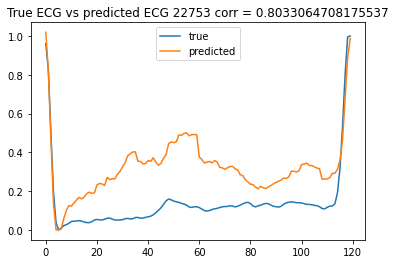

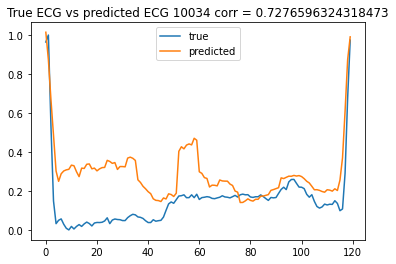

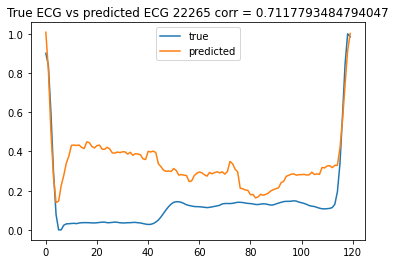

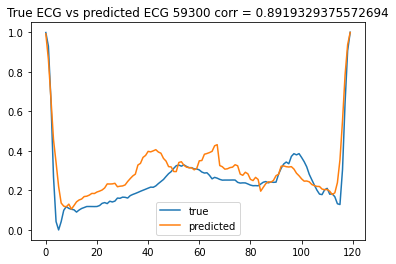

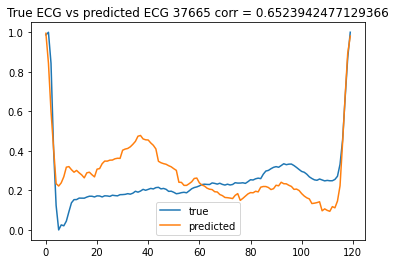

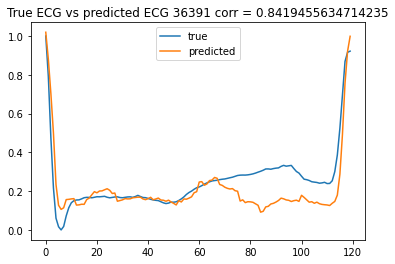

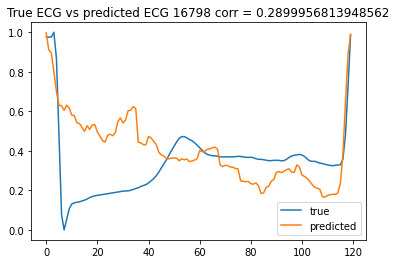

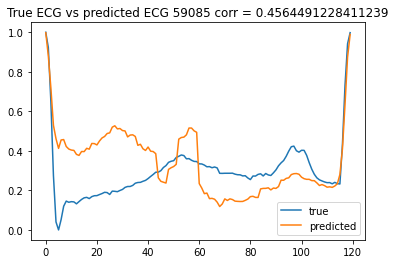

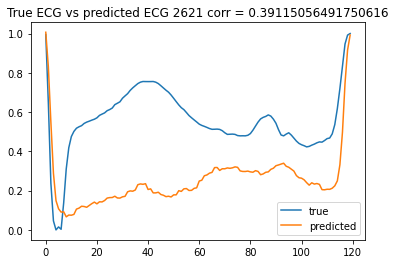

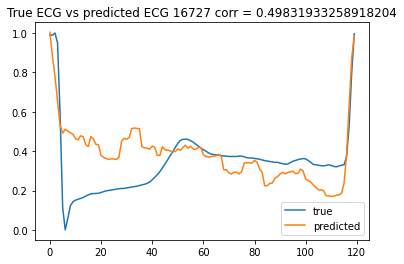

In [ ]:
import scipy
from scipy.stats.stats import pearsonr


i = np.random.randint(0,59330,10)
#plt.figure(figsize=(15,10))
corr = []
for j in range(10) :
  print(i[j])
  print("Correlation between signals are : ", pearsonr(E_test[i[j],:,0],pred[i[j],:,0])[0])
  #corr.append(scipy.signal.correlate( y_test[i[j],:,0],pred[i[j],:,0]  ))
  #plt.subplot(5,2,j+1)
  plt.figure()
  plt.plot(E_test[i[j],:,0],label = 'true')
  plt.plot(pred[i[j],:,0],label = 'predicted')
  plt.title("True ECG vs predicted ECG "+str(i[j])+" corr = "+str(pearsonr(E_test[i[j],:,0],pred[i[j],:,0])[0]))
  plt.legend()

#print("Correlation between signals are : ",corr[0])

In [ ]:
model.save('/content/gdrive/MyDrive/most cleaned version beats/traditional ae to retrain/model/PPG_ECG_autoencoder_beats_part1_part2')

In [ ]:
import shutil
shutil.make_archive('./PPG_ECG_autoencoder_beats_part1_part2', 'zip', './')

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/most cleaned version beats/traditional ae to retrain/model')

In [ ]:
from tensorflow.losses import mean_squared_error

ModuleNotFoundError: ignored